In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#IMPORTS
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
location = 'nw2'
turbine = 'f01'
mode = 'SS2'

In [4]:
# GET THE DATA
package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
data_folder = os.path.join(package_folder, 'data')

In [284]:
from src.data.utils import get_input_data
data = get_input_data(data_folder, location, turbine)
data['turbine_data'].columns

Index(['location', 'mean_NW2_F01_rpm', 'mean_NW2_F01_yaw', 'std_NW2_F01_pitch',
       'mean_NW2_F01_pitch', 'mean_NW2_F01_power', 'std_NW2_F01_towerxacc',
       'std_NW2_F01_toweryacc', 'std_NW2_F01_windspeed',
       'mean_NW2_F01_towerxacc', 'mean_NW2_F01_toweryacc',
       'mean_NW2_F01_windspeed', 'mean_NW2_F01_winddirection',
       'mpe_NW2_F01_FA', 'mpe_NW2_F01_SS', 'mpe_NW2_F01_SS1',
       'max_NW2_F01_NAC_ACC_Z', 'min_NW2_F01_NAC_ACC_Z',
       'rms_NW2_F01_NAC_ACC_Z', 'std_NW2_F01_NAC_ACC_Z',
       'max_NW2_F01_NAC_ACC_FA', 'max_NW2_F01_NAC_ACC_SS',
       'mean_NW2_F01_NAC_ACC_Z', 'min_NW2_F01_NAC_ACC_FA',
       'min_NW2_F01_NAC_ACC_SS', 'rms_NW2_F01_NAC_ACC_FA',
       'rms_NW2_F01_NAC_ACC_SS', 'std_NW2_F01_NAC_ACC_FA',
       'std_NW2_F01_NAC_ACC_SS', 'mean_NW2_F01_NAC_ACC_FA',
       'mean_NW2_F01_NAC_ACC_SS', 'rms1p_NW2_F01_NAC_ACC_Z',
       'rms1p_NW2_F01_NAC_ACC_FA', 'rms1p_NW2_F01_NAC_ACC_SS',
       'mpe_NW2_F01_FA1', 'mpe_NW2_F01_Z'],
      dtype='object')

In [285]:
from src.data.make_dataset import create_input_target_dataset
X, y = create_input_target_dataset(data_folder, location, turbine, mode)

In [286]:
X.columns

Index(['mean_NW2_F01_rpm', 'mean_NW2_F01_pitch', 'mean_NW2_F01_power',
       'mean_NW2_F01_windspeed', 'sin_mean_NW2_F01_yaw',
       'cos_mean_NW2_F01_yaw', 'sin_mean_NW2_F01_winddirection',
       'cos_mean_NW2_F01_winddirection',
       'mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Tide_TAW',
       'mvbc_WandelaarMeasuringpile_Relative_humidity',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature'],
      dtype='object')

In [287]:
#y = y[y>1.0]
X = X.loc[y.index]
X = X[['mean_NW2_F01_rpm', 'mean_NW2_F01_pitch', 'mean_NW2_F01_power', 'mean_NW2_F01_windspeed', 'mvbc_WandelaarMeasuringpile_Tide_TAW', 'mvbc_WandelaarBuoy_Sea_water_temperature', 
       'sin_mean_NW2_F01_yaw', 'cos_mean_NW2_F01_yaw', 
       'sin_mean_NW2_F01_winddirection','cos_mean_NW2_F01_winddirection',
       'mvbc_WandelaarBuoy_Average_wave_period']]

rpm_split = 6.6

X_lowrpm = X.loc[X.filter(regex = 'rpm')[X.filter(regex = 'rpm') < rpm_split].dropna().index]
y_lowrpm = y.loc[X_lowrpm.index]

# Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lowrpm, y_lowrpm, test_size=0.01, shuffle=False)
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.01, shuffle=True, random_state=123)

In [288]:
X

,mean_NW2_F01_rpm,mean_NW2_F01_pitch,mean_NW2_F01_power,mean_NW2_F01_windspeed,mvbc_WandelaarMeasuringpile_Tide_TAW,mvbc_WandelaarBuoy_Sea_water_temperature,sin_mean_NW2_F01_yaw,cos_mean_NW2_F01_yaw,sin_mean_NW2_F01_winddirection,cos_mean_NW2_F01_winddirection,mvbc_WandelaarBuoy_Average_wave_period
timestamp,,,,,,,,,,,
2023-01-01 00:00:00+00:00,10.445,14.800,9525.056,20.895,195.000000,9.000000,-0.208424,-0.978039,-0.202223,-0.979339,3.930000
2023-01-01 00:10:00+00:00,10.445,15.247,7700.224,20.188,186.000000,8.966667,-0.189284,-0.981922,-0.178734,-0.983898,3.966667
2023-01-01 00:20:00+00:00,10.445,13.541,8752.705,19.617,177.000000,8.933333,-0.132429,-0.991192,-0.116445,-0.993197,4.003333
2023-01-01 00:30:00+00:00,10.445,12.701,9525.056,19.918,168.000000,8.900000,-0.080008,-0.996794,-0.092162,-0.995744,4.040000
2023-01-01 00:40:00+00:00,10.445,13.289,9524.865,20.297,162.666667,8.900000,-0.081956,-0.996636,-0.102376,-0.994746,4.053333
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 23:20:00+00:00,10.445,-2.686,6572.352,10.625,331.666667,13.700000,0.108190,0.994130,0.130492,0.991449,4.793333
2023-05-31 23:30:00+00:00,10.445,-2.910,7195.904,11.039,327.000000,13.700000,0.264866,0.964285,0.284584,0.958651,4.840000
2023-05-31 23:40:00+00:00,10.445,-3.637,8366.401,11.500,320.666667,13.733333,0.219386,0.975638,0.194080,0.980986,4.776667


In [289]:
X_lowrpm

,mean_NW2_F01_rpm,mean_NW2_F01_pitch,mean_NW2_F01_power,mean_NW2_F01_windspeed,mvbc_WandelaarMeasuringpile_Tide_TAW,mvbc_WandelaarBuoy_Sea_water_temperature,sin_mean_NW2_F01_yaw,cos_mean_NW2_F01_yaw,sin_mean_NW2_F01_winddirection,cos_mean_NW2_F01_winddirection,mvbc_WandelaarBuoy_Average_wave_period
timestamp,,,,,,,,,,,
2023-01-01 10:20:00+00:00,4.178,50.302,805.120,13.895,291.666667,9.000000,-0.347574,-0.937653,-0.363560,-0.931571,3.553333
2023-01-01 10:40:00+00:00,6.267,35.838,2334.208,13.035,269.333333,9.000000,-0.369455,-0.929249,-0.397420,-0.917637,3.556667
2023-01-01 10:50:00+00:00,5.968,30.466,711.296,14.219,256.666667,9.000000,-0.421036,-0.907044,-0.409477,-0.912320,3.563333
2023-01-01 12:30:00+00:00,3.283,55.701,910.848,10.816,153.000000,9.000000,-0.166700,-0.986008,-0.165753,-0.986167,3.600000
2023-01-01 19:10:00+00:00,6.565,0.783,410.432,5.063,353.000000,8.933333,0.070731,-0.997495,0.031725,-0.999497,3.380000
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 04:30:00+00:00,0.597,74.921,-122.624,10.398,79.000000,14.100000,0.558252,0.829671,0.555425,0.831567,3.760000
2023-05-31 07:00:00+00:00,5.968,31.809,2197.824,10.582,195.000000,13.700000,0.449600,0.893230,0.450021,0.893018,3.570000
2023-05-31 07:10:00+00:00,0.298,78.026,-120.320,11.305,210.333333,13.600000,0.530408,0.847743,0.524179,0.851608,3.643333


In [290]:
from catboost import CatBoostRegressor, Pool, EShapCalcType, EFeaturesSelectionAlgorithm

regr_model = CatBoostRegressor(iterations=2000, depth=3, random_seed=0, posterior_sampling=True, loss_function='RMSEWithUncertainty', verbose=False, learning_rate=0.01)
regr_model.fit(X_train, y_train)

In [291]:
low_rpm_preds_ = regr_model.virtual_ensembles_predict(X_lowrpm, prediction_type='TotalUncertainty', virtual_ensembles_count=20, ntree_end=100)
low_rpm_preds_df = pd.DataFrame(low_rpm_preds_, columns=['prediction', 'knowledge uncertainty', 'data uncertainty'], index=X_lowrpm.index)

low_rpm_preds = low_rpm_preds_[:,0] # mean values predicted by a virtual ensemble
low_rpm_knowledge_uncertainty = low_rpm_preds_[:,1] # knowledge uncertainty predicted by a virtual ensemble
low_rpm_data_uncertainty = low_rpm_preds_[:,2] # average estimated data uncertainty


In [292]:
preds_ = regr_model.virtual_ensembles_predict(X, prediction_type='TotalUncertainty', virtual_ensembles_count=20, ntree_end=100)
preds_df = pd.DataFrame(preds_, columns=['prediction', 'knowledge uncertainty', 'data uncertainty'], index=X.index)

preds = preds_[:,0] # mean values predicted by a virtual ensemble
knowledge_uncertainty = preds_[:,1] # knowledge uncertainty predicted by a virtual ensemble
data_uncertainty = preds_[:,2] # average estimated data uncertainty

In [293]:
full_predicitions_ = pd.DataFrame(regr_model.predict(X), index=X.index)

full_predicitions_uncertainty = full_predicitions_.iloc[:,1]
full_predicitions = full_predicitions_.iloc[:,0]

In [294]:
data_uncertainty_lim = 0.00015
low_data_uncertainty_predictipons = preds_df[preds_df['data uncertainty'] < data_uncertainty_lim]

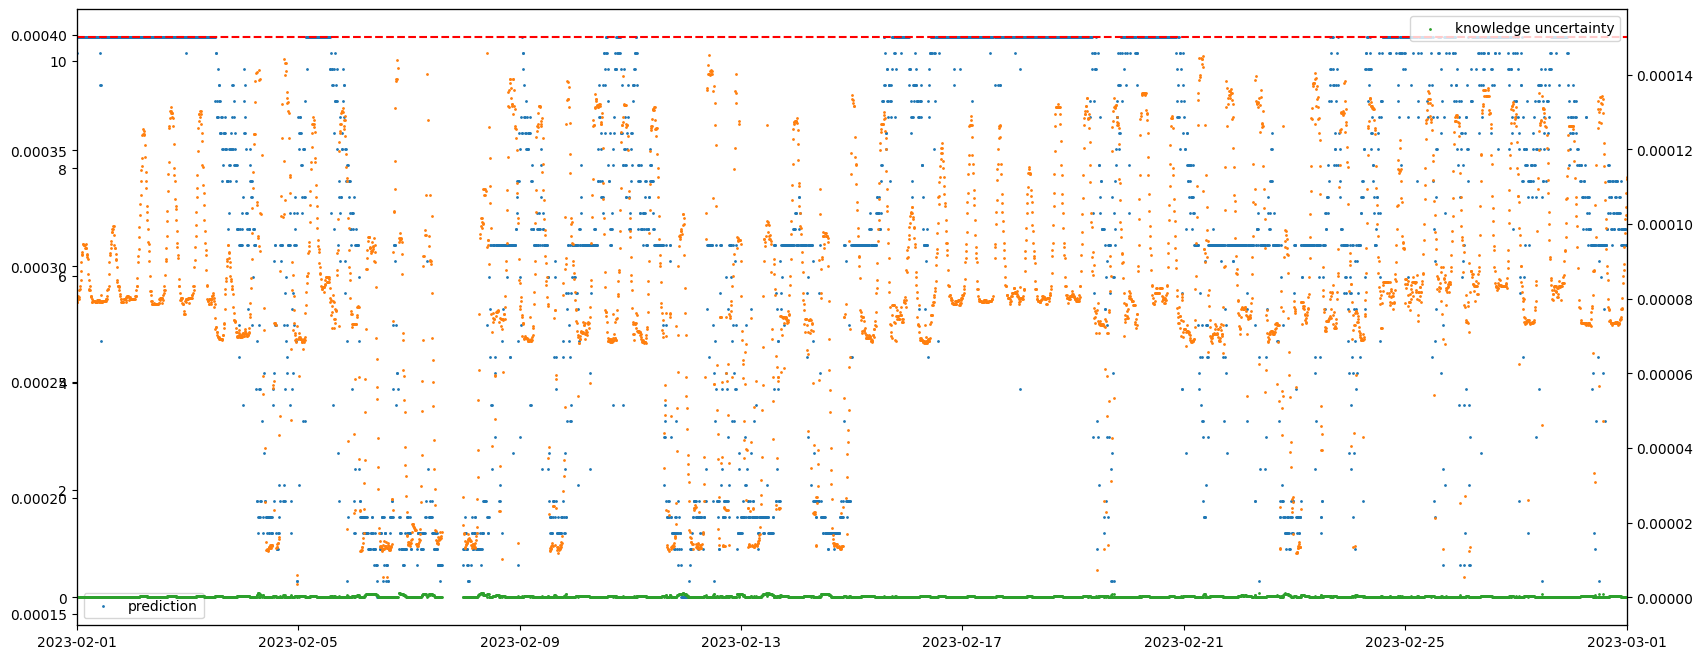

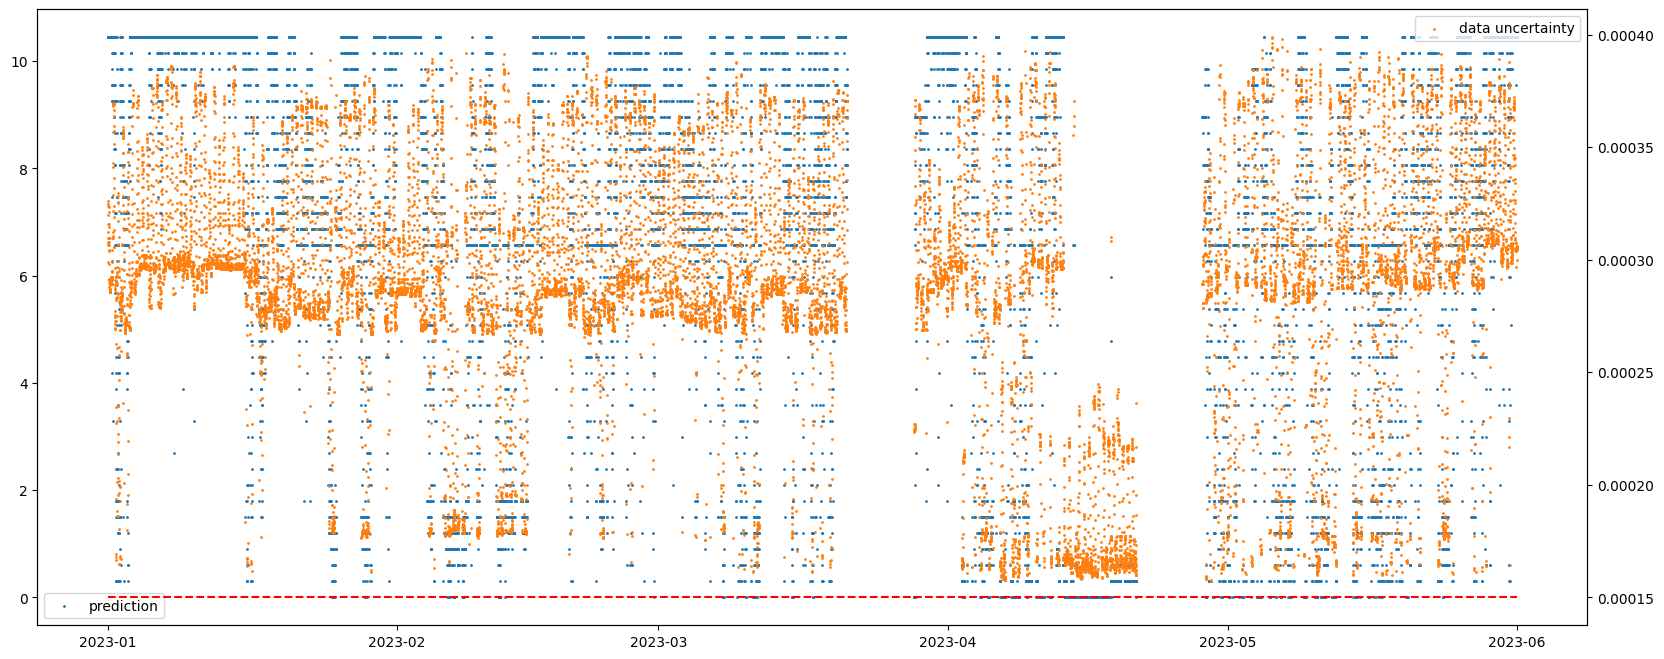

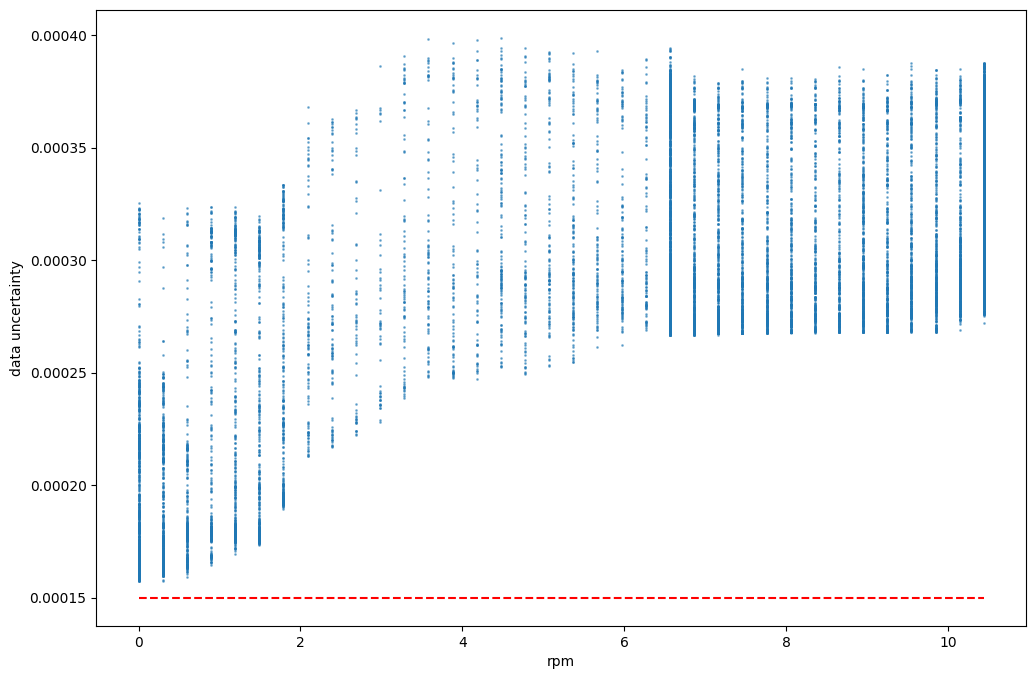

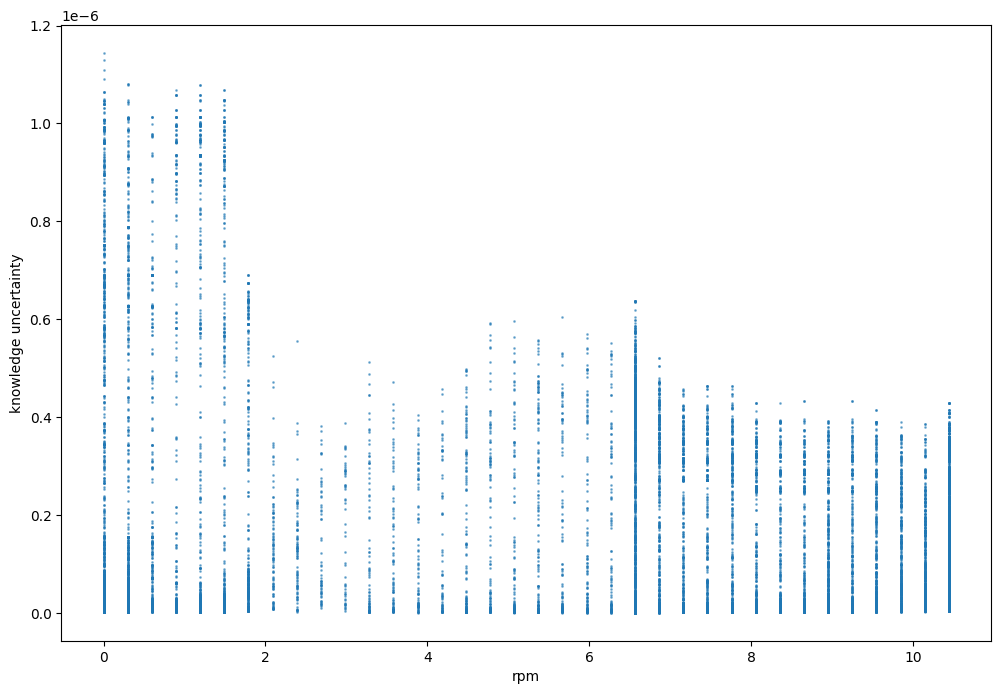

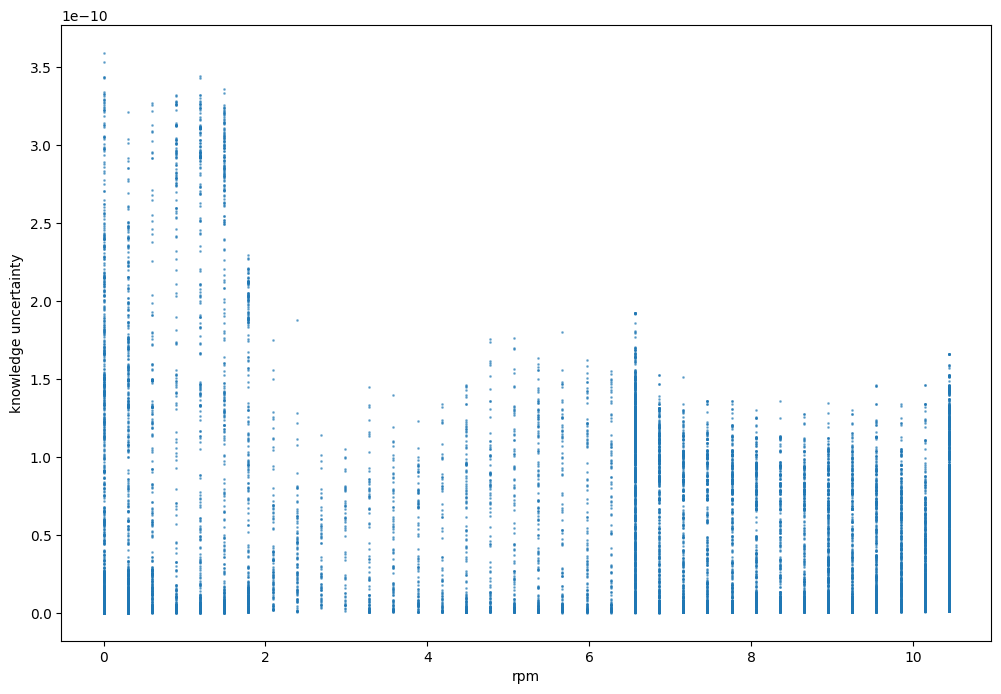

In [308]:
plt.figure(figsize=(20,8))
X['mvbc_WandelaarMeasuringpile_Tide_TAW'] = np.NaN
# Plot the first scatter plot
plt.scatter(X.index, X.filter(regex='rpm'), label='prediction', s=1)
plt.legend()
# Create the twin axis
ax2 = plt.twinx()

# Plot the second scatter plot on the twin axis
#ax2.scatter(preds_df.index, preds_df['knowledge uncertainty'], label='knowledge uncertainty')
ax2.scatter(preds_df.index, preds_df['data uncertainty'], label='data uncertainty', s=1, color='tab:orange')
ax3 = plt.twinx()
ax3.scatter(preds_df.index, preds_df['knowledge uncertainty'], label='knowledge uncertainty', s=1, color='tab:green')

plt.xlim(datetime.datetime(2023, 2, 1), datetime.datetime(2023, 3, 1))
plt.hlines(data_uncertainty_lim, datetime.datetime(2023, 2, 1), datetime.datetime(2023, 3, 1), color='red', linestyle='--')
# Show the legend
plt.legend(loc='upper right')

# Show the plot
plt.show()
plt.close()

plt.figure(figsize=(20,8))

# Plot the first scatter plot
plt.scatter(X.index, X.filter(regex='rpm'), label='prediction', s=1)
plt.legend()
# Create the twin axis
ax2 = plt.twinx()

# Plot the second scatter plot on the twin axis
#ax2.scatter(preds_df.index, preds_df['knowledge uncertainty'], label='knowledge uncertainty')
ax2.scatter(preds_df.index, preds_df['data uncertainty'], label='data uncertainty', s=1, color='tab:orange')
plt.hlines(data_uncertainty_lim, preds_df.index[0] ,preds_df.index[-1], color='red', linestyle='--')
# Show the legend
plt.legend(loc='upper right')

# Show the plot
plt.show()
plt.close()


plt.figure(figsize=(12,8))
plt.scatter(X.filter(regex='rpm'), preds_df['data uncertainty'], s=1, alpha=0.5)
plt.ylabel('data uncertainty')
plt.xlabel('rpm')
plt.hlines(data_uncertainty_lim, 0, X.filter(regex='rpm').max(), color='red', linestyle='--')
plt.show()
plt.close()


plt.figure(figsize=(12,8))
plt.scatter(X.filter(regex='rpm'), preds_df['knowledge uncertainty'], s=1, alpha=0.5)
plt.ylabel('knowledge uncertainty')
plt.xlabel('rpm')
plt.show()
plt.close()

plt.figure(figsize=(12,8))
plt.scatter(X.filter(regex='rpm'), preds_df['knowledge uncertainty']*preds_df['data uncertainty'], s=1, alpha=0.5)
plt.ylabel('knowledge uncertainty')
plt.xlabel('rpm')
plt.show()
plt.close()

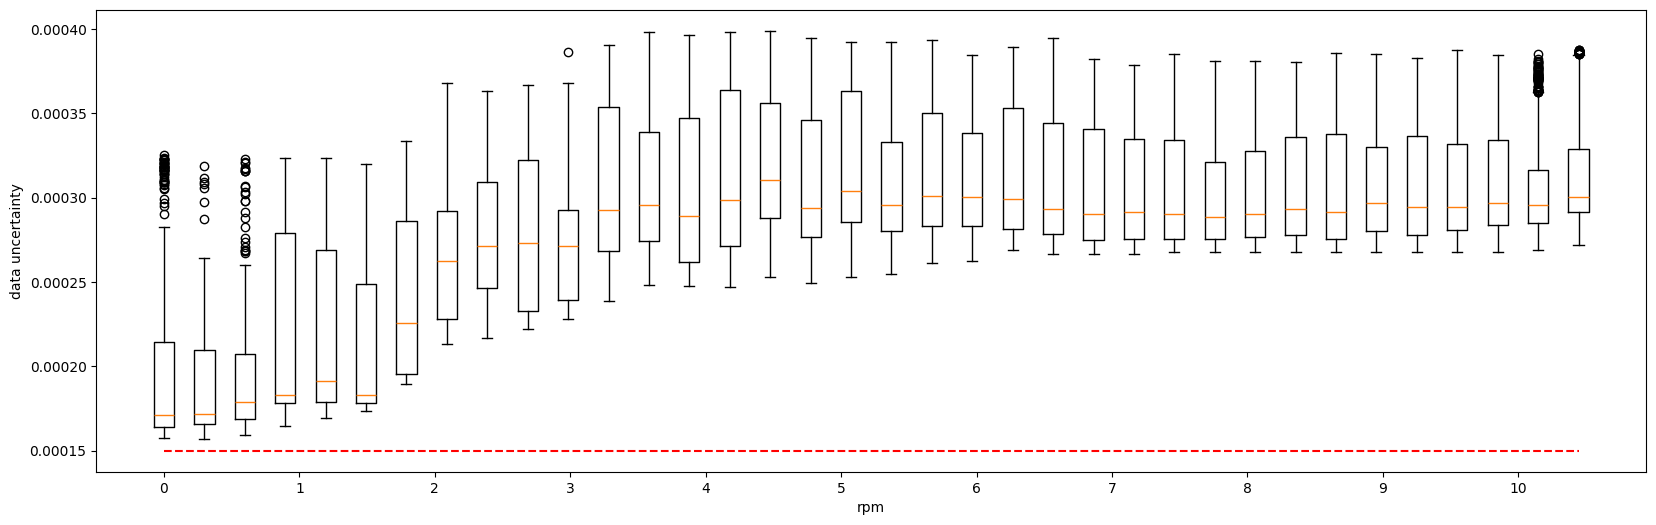

In [296]:
boxplot_data = pd.DataFrame({'data uncertainty':preds_df['data uncertainty'].values, 'rpm':X.filter(regex='rpm').values[:,0]})
rpms = np.unique(boxplot_data['rpm'])
plt.figure(figsize=(20,6))
for rpm in rpms:
    # Make a boxplot at the x value of the rpm
    plt.boxplot(boxplot_data[boxplot_data['rpm']==rpm]['data uncertainty'], positions=[rpm])
plt.ylabel('data uncertainty')
plt.xlabel('rpm')
plt.hlines(data_uncertainty_lim, 0, X.filter(regex='rpm').max(), color='red', linestyle='--')
# Only show one x tick every 5 ticks
plt.xticks(np.arange(11), np.arange(11))
plt.show()
plt.close()

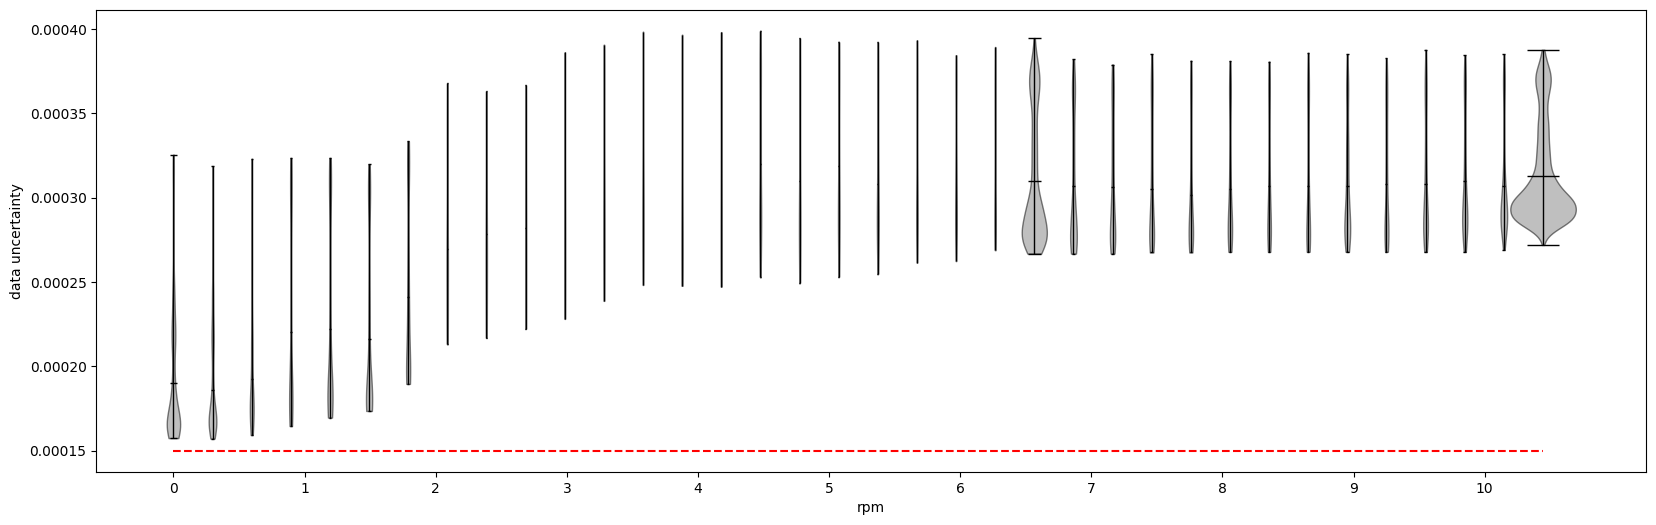

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming boxplot_data and data_uncertainty_lim are already defined

# Count and normalize samples per RPM
sample_counts = boxplot_data.groupby('rpm').size()
max_samples = sample_counts.max()
normalized_widths = sample_counts / max_samples * 0.5  # Adjust 0.5 to control max width

plt.figure(figsize=(20,6))
for rpm in rpms:
    # Set the width of the violin plot based on sample count
    width = normalized_widths[rpm]
    
    # Generate the violin plot with dynamic width
    violin = plt.violinplot(boxplot_data[boxplot_data['rpm'] == rpm]['data uncertainty'], positions=[rpm], showmeans=True, widths=width)
    
    # Customize the appearance
    for pc in violin["bodies"]:
        pc.set_facecolor("grey")
        pc.set_edgecolor("black")
        pc.set_alpha(0.5)

    for partname in ('cbars', 'cmins', 'cmaxes', 'cmeans'):
        vp = violin[partname]
        vp.set_edgecolor("k")
        vp.set_linewidth(1)

plt.ylabel('data uncertainty')
plt.xlabel('rpm')
plt.hlines(data_uncertainty_lim, 0, X.filter(regex='rpm').max(), color='red', linestyle='--')
plt.xticks(np.arange(11), np.arange(11))

plt.show()
plt.close()


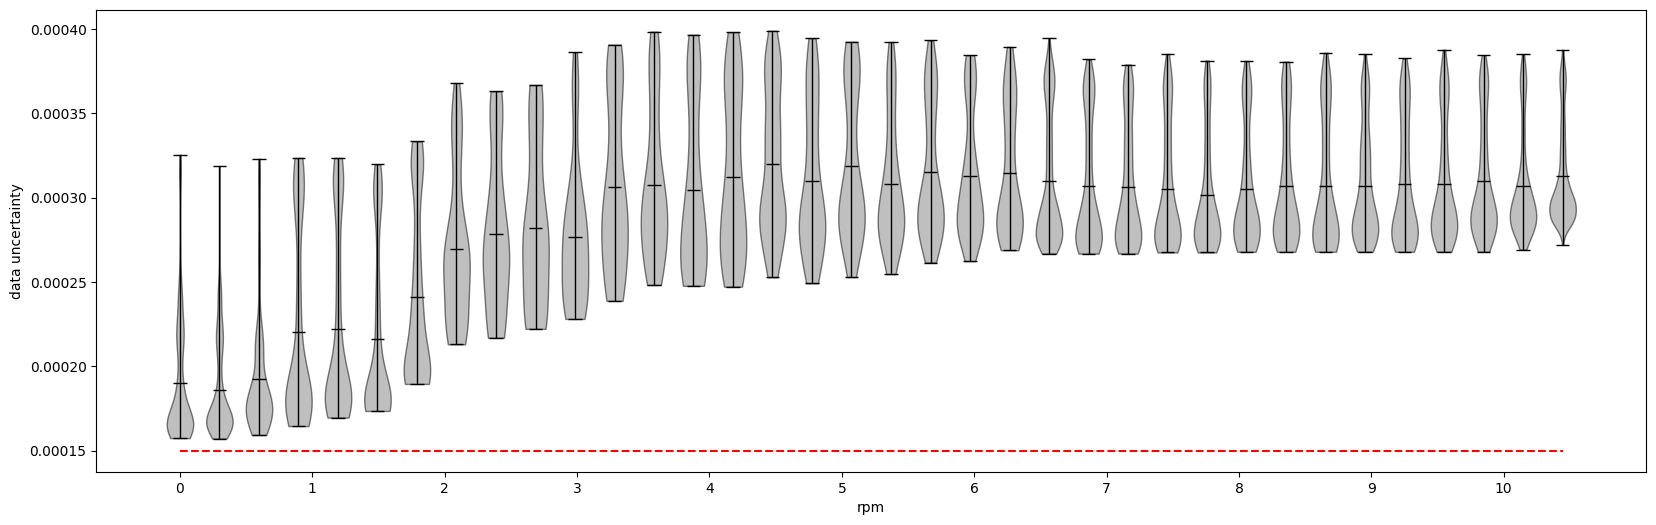

In [298]:
boxplot_data = pd.DataFrame({'data uncertainty':preds_df['data uncertainty'].values, 'rpm':X.filter(regex='rpm').values[:,0]})
rpms = np.unique(boxplot_data['rpm'])
plt.figure(figsize=(20,6))
for rpm in rpms:
    # Make a violinplot at the x value of the rpm width=0.5 # in a black color with mean in red
    violin = plt.violinplot(boxplot_data[boxplot_data['rpm']==rpm]['data uncertainty'], positions=[rpm], showmeans=True, widths=0.2)

    #plt.violinplot(boxplot_data[boxplot_data['rpm']==rpm]['data uncertainty'], positions=[rpm], showmeans=True, widths=0.2, c='k')
    # Make a boxplot at the x value of the rpm
    #plt.boxplot(boxplot_data[boxplot_data['rpm']==rpm]['data uncertainty'], positions=[rpm])
    for pc in violin["bodies"]:
        pc.set_facecolor("grey")
        pc.set_edgecolor("black")
        pc.set_alpha(0.5)

    for partname in ('cbars', 'cmins', 'cmaxes'):
        vp = violin[partname]
        vp.set_edgecolor("k")
        vp.set_linewidth(1)

    for partname in (['cmeans']):
        vp = violin[partname]
        vp.set_edgecolor("k")
        vp.set_linewidth(1)  



plt.ylabel('data uncertainty')
plt.xlabel('rpm')
plt.hlines(data_uncertainty_lim, 0, X.filter(regex='rpm').max(), color='red', linestyle='--')
# Only show one x tick every 5 ticks
plt.xticks(np.arange(11), np.arange(11))
plt.show()
plt.close()

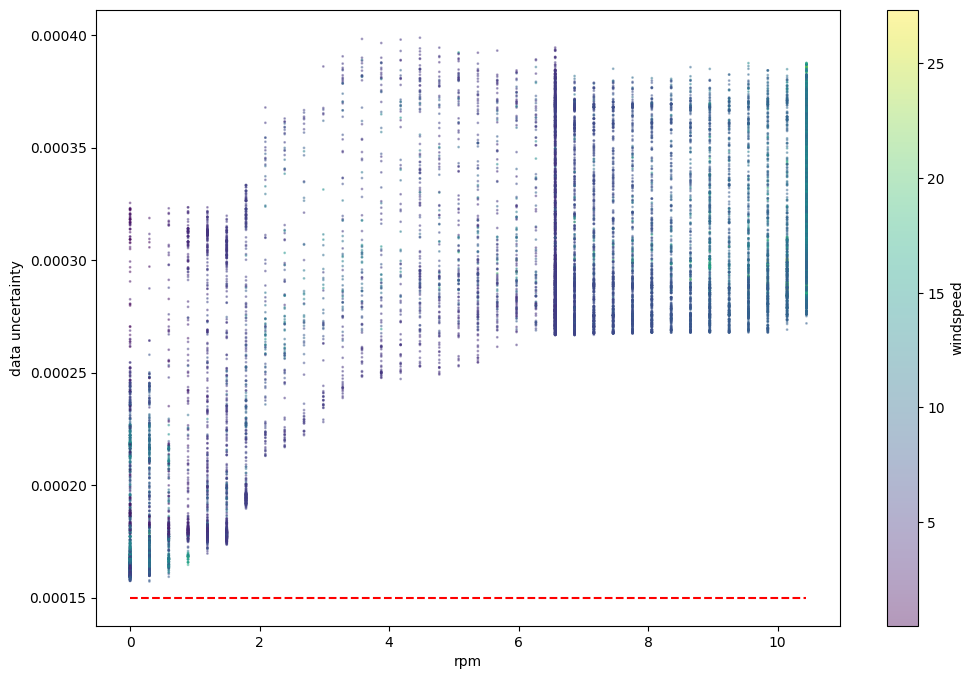

In [299]:
plt.figure(figsize=(12,8))
plt.scatter(X.filter(regex='rpm'), preds_df['data uncertainty'], c=X.filter(regex='windspeed').values, cmap='viridis' ,s=1, alpha=0.4)
cbar = plt.colorbar()
# increase alpha of the colorbar to 1
cbar.set_alpha(1)
cbar.set_label('windspeed')
plt.ylabel('data uncertainty')
plt.xlabel('rpm')
plt.hlines(data_uncertainty_lim, 0, X.filter(regex='rpm').max(), color='red', linestyle='--')
plt.show()
plt.close()

In [300]:
def transform_uncertainty(uncertainty: pd.Series, max_value: float):
    transformed_uncertainty = uncertainty.copy()
    transformed_uncertainty[transformed_uncertainty > max_value] = max_value
    transformed_uncertainty = transformed_uncertainty / max_value
    return transformed_uncertainty

transformed_data_uncertainty = transform_uncertainty(data_uncertainty, data_uncertainty_lim)

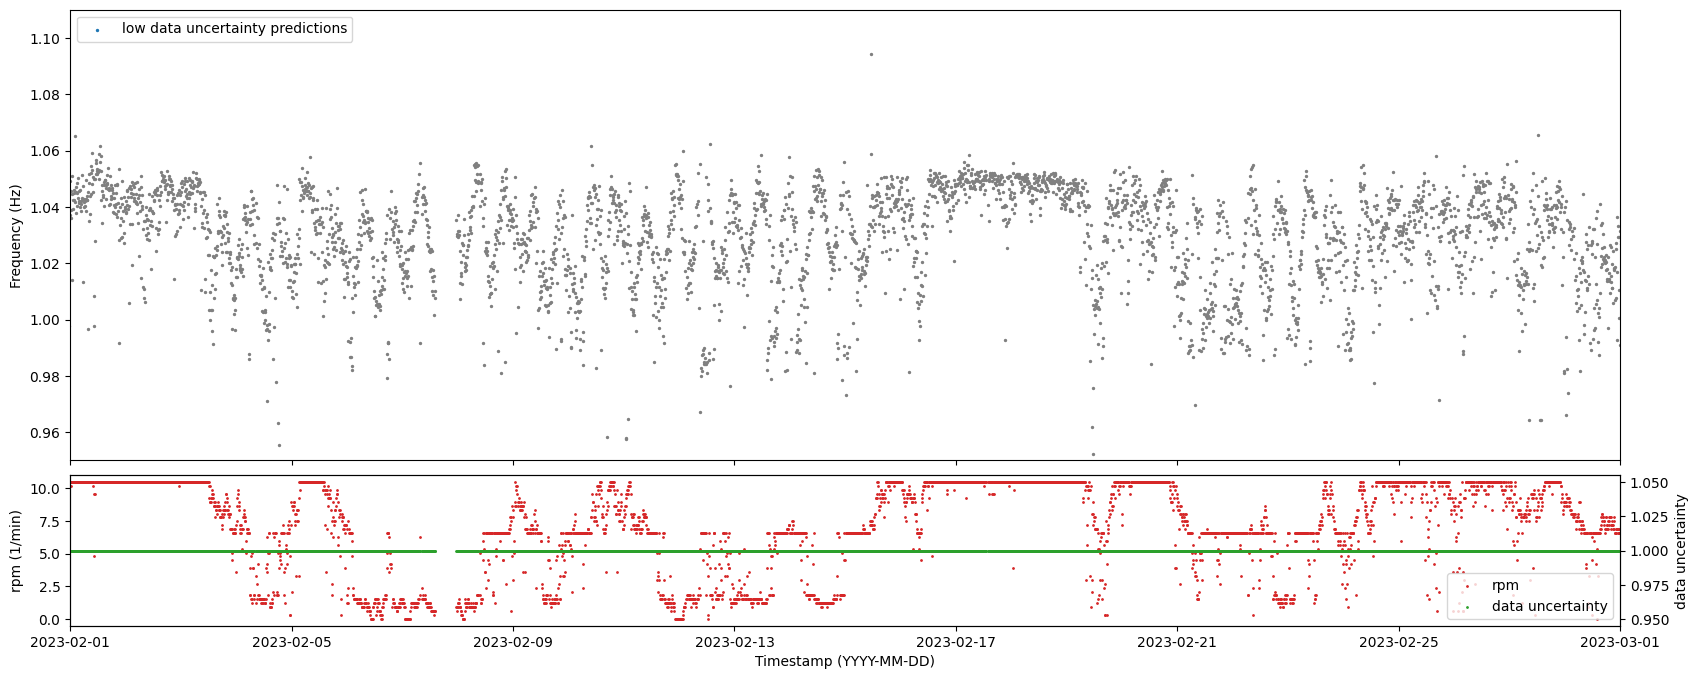

In [301]:
import matplotlib.pyplot as plt
import datetime

# Create two subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Plot on the first subplot
ax1.scatter(y.index, y, s=2, color='grey')
#ax1.scatter(y_lowrpm.index, low_rpm_preds_df['prediction'], s=10, color='tab:blue', label='low rpm predictions')
#ax1.scatter(low_data_uncertainty_predictipons.index, low_data_uncertainty_predictipons['prediction'], s=2, color='tab:orange', label='low data uncertainty predictions')
ax1.scatter(low_data_uncertainty_predictipons.index, full_predicitions.loc[low_data_uncertainty_predictipons.index], s=2, color='tab:blue', label='low data uncertainty predictions')
#ax1.scatter(smart_tracked_modes.index, smart_tracked_modes, s=1, color='k', label='smart tracked modes')

ax1.set_ylim(0.95, 1.11)
ax1.legend(loc='upper left')
ax1.set_ylabel('Frequency (Hz)')

# Plot on the second subplot
ax2.scatter(X.index, X.filter(regex='rpm'), label='rpm', s=1, color='tab:red')
ax2.set_ylabel('rpm (1/min)')
ax2.set_xlabel('Timestamp (YYYY-MM-DD)')

ax3 = ax2.twinx()
ax3.scatter(X.index,transformed_data_uncertainty, label='data uncertainty', s=1, color='tab:green')
ax3.set_ylabel('data uncertainty')
#ax3.set_ylim(0,1.05)

# Collect handles and labels for ax2 and ax3
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()

# Combine handles and labels
combined_handles = handles2 + handles3
combined_labels = labels2 + labels3

# Create a single combined legend
plt.legend(combined_handles, combined_labels, loc='lower right')

# Set shared x-axis properties
plt.xlim(datetime.datetime(2023, 2, 1), datetime.datetime(2023, 3, 1))
plt.subplots_adjust(hspace=0.05)  # Adjust this value as needed


plt.show()
plt.close()


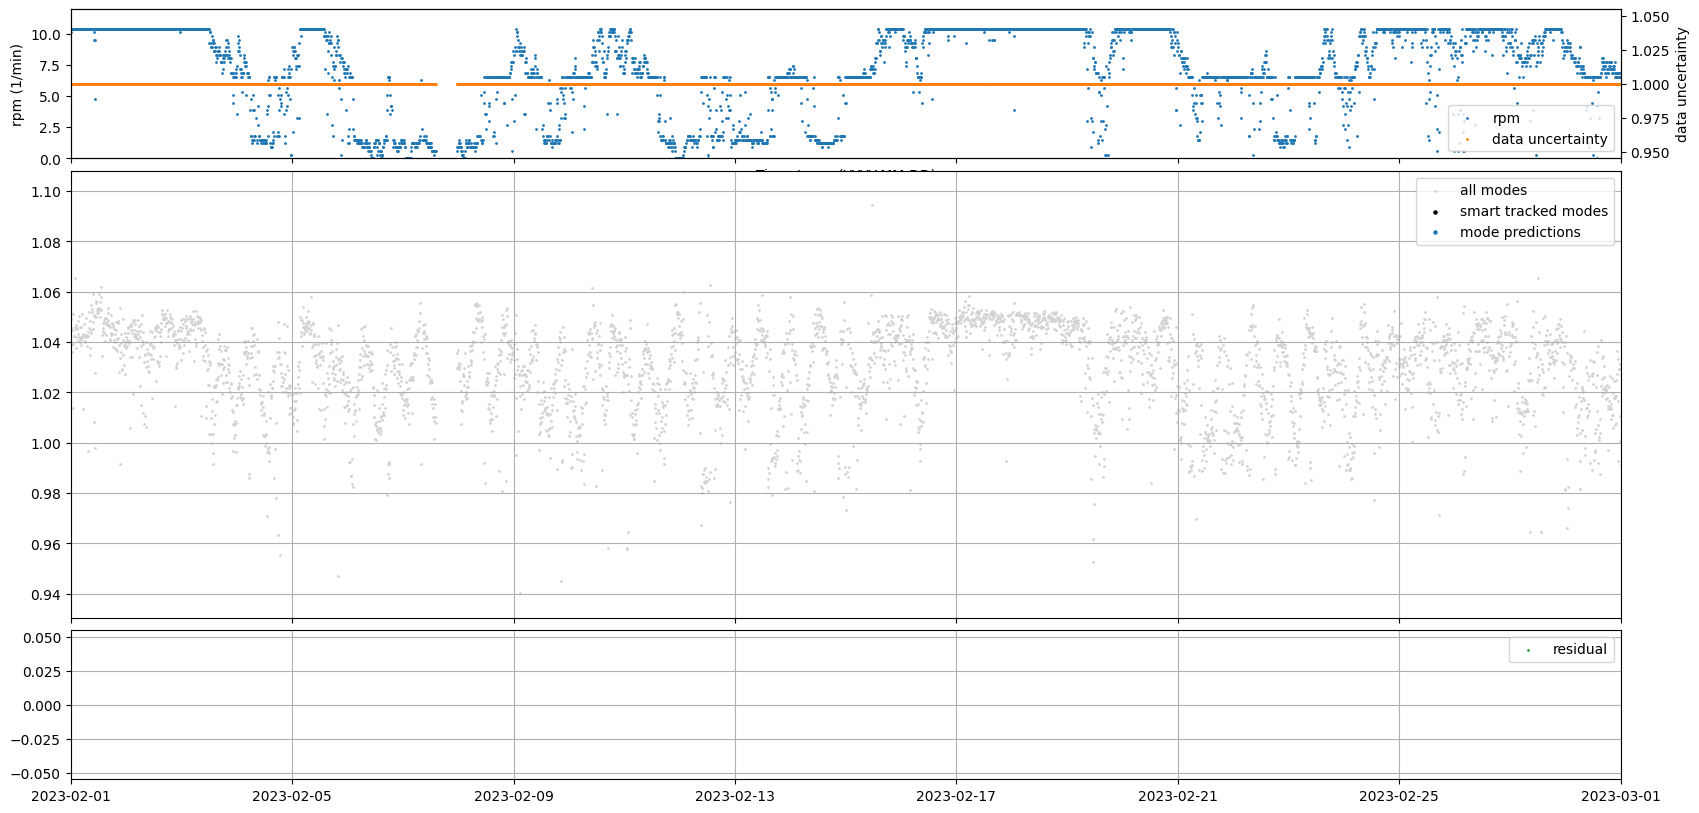

In [302]:
def transform_uncertainty(uncertainty: pd.Series, max_value: float):
    transformed_uncertainty = uncertainty.copy()
    transformed_uncertainty[transformed_uncertainty > max_value] = max_value
    transformed_uncertainty = transformed_uncertainty / max_value
    return transformed_uncertainty

def smart_track(tracked_modes: pd.Series, predictions: pd.Series, uncertainty: pd.Series, uncertainty_limit: float):
    smart_tracked = tracked_modes.loc[uncertainty<uncertainty_limit].copy()
    return smart_tracked

transformed_data_uncertainty = transform_uncertainty(data_uncertainty, data_uncertainty_lim)
smart_tracked_modes = smart_track(y, preds, data_uncertainty, data_uncertainty_lim)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [1, 3, 1]})

# Plot on the second subplot
ax1.scatter(X.index, X.filter(regex='rpm'), label='rpm', s=1, color='tab:blue')
ax1.set_ylabel('rpm (1/min)')
ax1.set_xlabel('Timestamp (YYYY-MM-DD)')
ax1.set_ylim(0,12)

ax4 = ax1.twinx()
ax4.scatter(X.index,transformed_data_uncertainty, label='data uncertainty', s=1, color='tab:orange')
ax4.set_ylabel('data uncertainty')

# Collect handles and labels for ax2 and ax3
handles2, labels2 = ax1.get_legend_handles_labels()
handles3, labels3 = ax4.get_legend_handles_labels()

# Combine handles and labels
combined_handles = handles2 + handles3
combined_labels = labels2 + labels3

# Create a single combined legend
plt.legend(combined_handles, combined_labels, loc='lower right')

ax2.scatter(y.index, y, s=1, color='lightgrey', label = 'all modes')
ax2.scatter(smart_tracked_modes.index, smart_tracked_modes, s=5, color='k', label='smart tracked modes')
ax2.scatter(smart_tracked_modes.index, full_predicitions.loc[smart_tracked_modes.index], s=5, color='tab:blue', label='mode predictions')
ax2.legend()
ax2.grid()

ax3.scatter(smart_tracked_modes.index, y.loc[smart_tracked_modes.index] - full_predicitions.loc[smart_tracked_modes.index], s=1, color='tab:green', label='residual')
ax3.legend()
ax3.grid()

plt.xlim(datetime.datetime(2023, 2, 1), datetime.datetime(2023, 3, 1))
plt.subplots_adjust(hspace=0.05)  # Adjust this value as needed

plt.show()
plt.close()


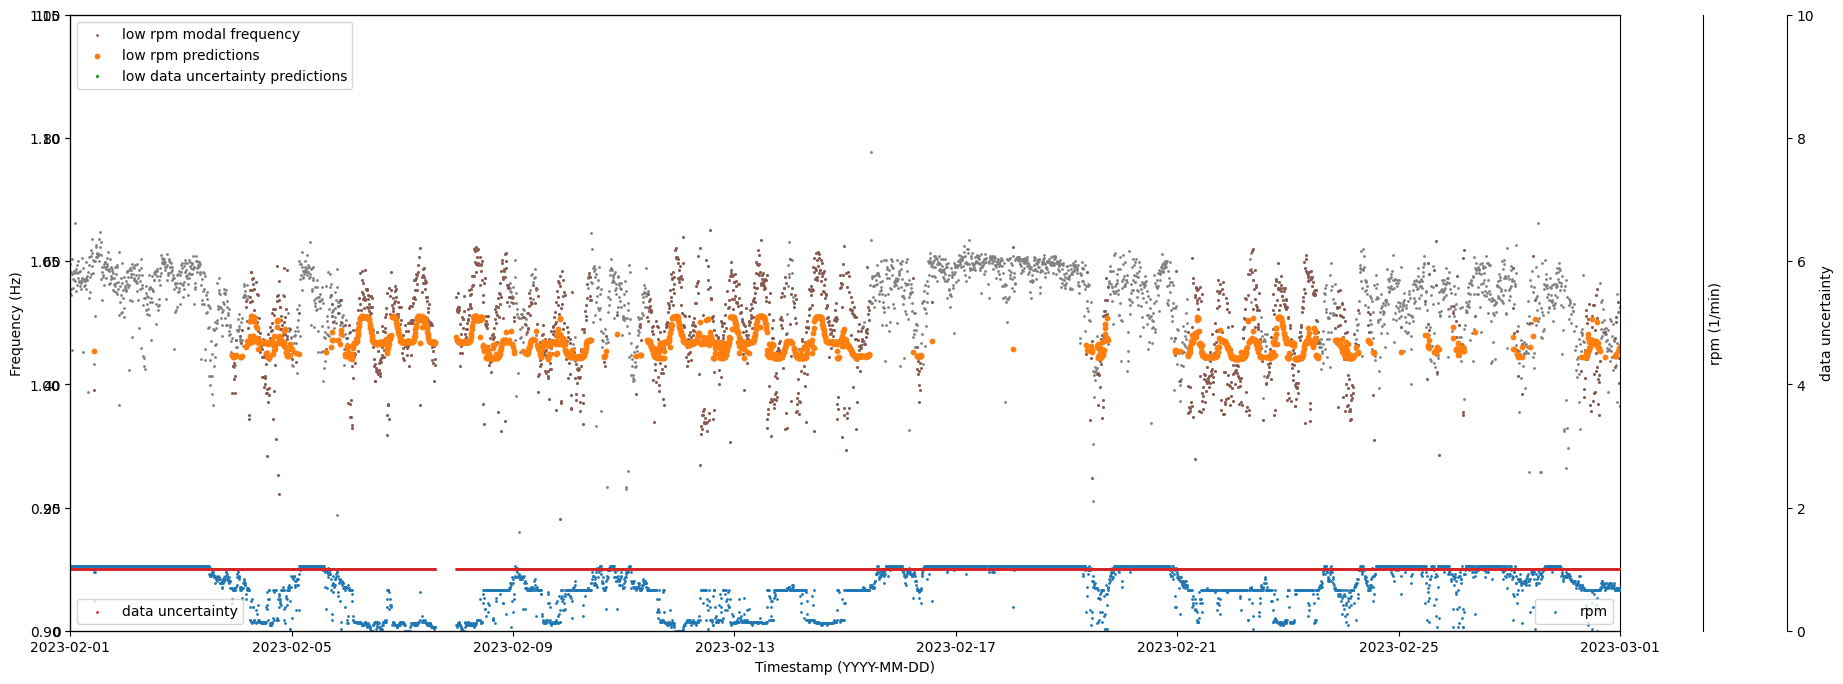

In [303]:
import matplotlib.pyplot as plt
import datetime
plt.figure(figsize=(20,8))
plt.scatter(y.index, y, s=1, color='grey')
#plt.scatter(preds_df.index, preds_df['prediction'], s=1, label='all predcitions', color='tab:blue')

plt.scatter(y_lowrpm.index, y_lowrpm, s=1, color='tab:brown', label='low rpm modal frequency')
plt.scatter(y_lowrpm.index, low_rpm_preds_df['prediction'], s=10, color='tab:orange', label='low rpm predictions')
plt.scatter(low_data_uncertainty_predictipons.index, low_data_uncertainty_predictipons['prediction'], s=2, color='tab:green', label='low data uncertainty predictions')
plt.ylim(0.9, 1.15)
plt.legend(loc='upper left')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Timestamp (YYYY-MM-DD)')

ax2 = plt.twinx()
ax2.scatter(X.index, X.filter(regex='rpm'), label='rpm', s=1, color='tab:blue')
ax2.set_ylabel('rpm (1/min)')
ax2.spines['right'].set_position(('outward', 60))  # Adjust the position of the right spine
ax2.legend(loc='lower right')
ax2.set_ylim(0,100)

ax3 = plt.twinx()
ax3.spines['right'].set_position(('outward', 120))  # Adjust the position of the right spine further
ax3.scatter(X.index,transformed_data_uncertainty, label='data uncertainty', s=1, color='tab:red')
ax3.set_ylabel('data uncertainty')
ax3.set_ylim(0,10)

plt.xlim(datetime.datetime(2023, 2, 1), datetime.datetime(2023, 3, 1))
plt.legend(loc='lower left')

plt.show()
plt.close()

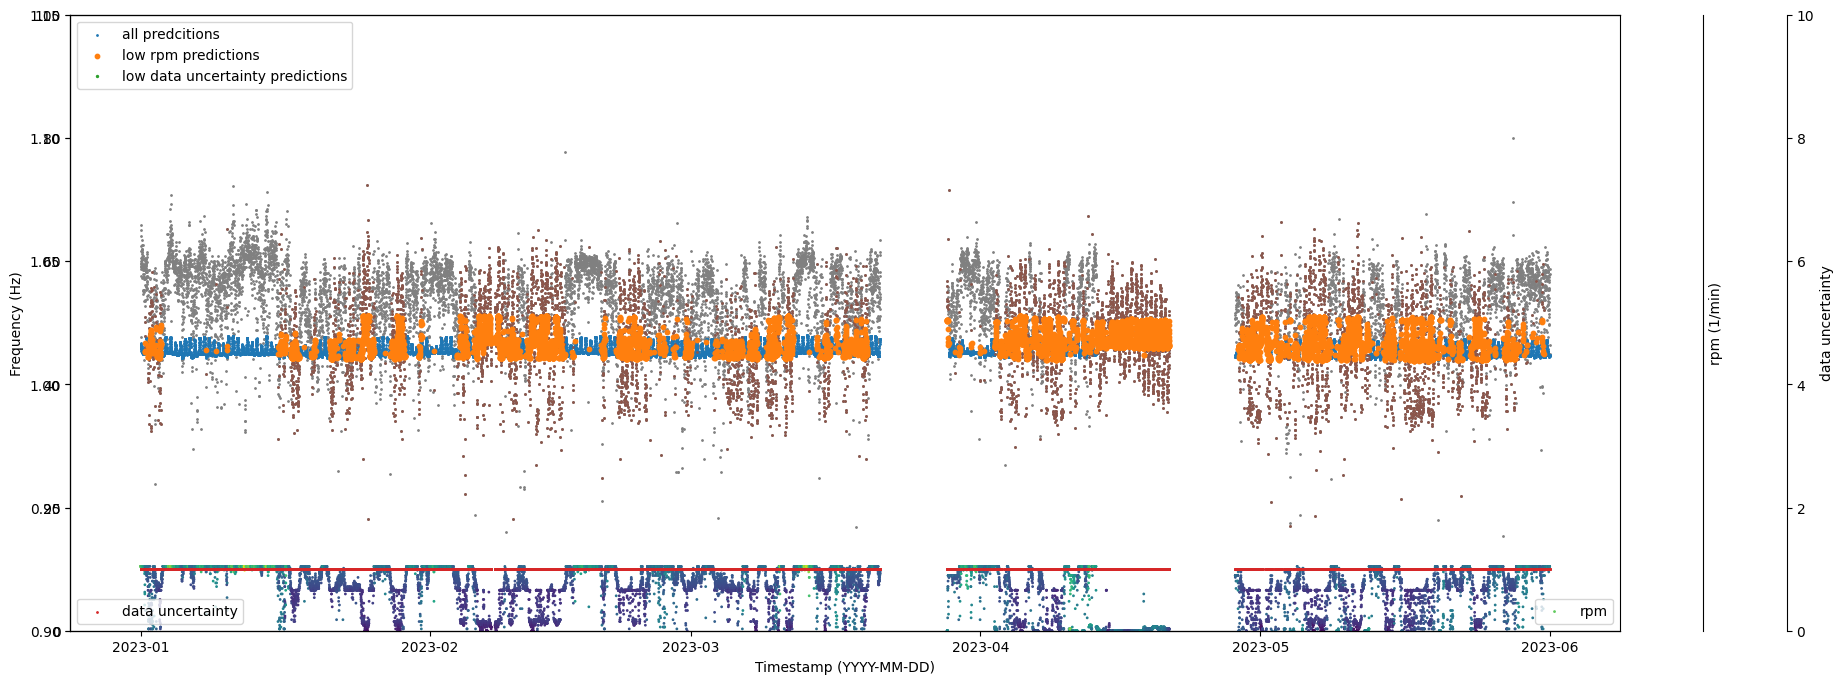

In [304]:
    import matplotlib.pyplot as plt
import datetime
plt.figure(figsize=(20,8))
plt.scatter(y.index, y, s=1, color='grey')
plt.scatter(preds_df.index, preds_df['prediction'], s=1, label='all predcitions', color='tab:blue')

plt.scatter(y_lowrpm.index, y_lowrpm, s=1, color='tab:brown')
plt.scatter(y_lowrpm.index, low_rpm_preds_df['prediction'], s=10, color='tab:orange', label='low rpm predictions')
plt.scatter(low_data_uncertainty_predictipons.index, low_data_uncertainty_predictipons['prediction'], s=2, color='tab:green', label='low data uncertainty predictions')
plt.ylim(0.9, 1.15)
plt.legend(loc='upper left')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Timestamp (YYYY-MM-DD)')

ax2 = plt.twinx()
ax2.scatter(X.index, X.filter(regex='rpm'), label='rpm', s=1, c=X.filter(regex='windspeed').values, cmap='viridis')
ax2.set_ylabel('rpm (1/min)')
ax2.spines['right'].set_position(('outward', 60))  # Adjust the position of the right spine
ax2.legend(loc='lower right')
ax2.set_ylim(0,100)

ax3 = plt.twinx()
ax3.spines['right'].set_position(('outward', 120))  # Adjust the position of the right spine further
ax3.scatter(X.index,transformed_data_uncertainty, label='data uncertainty', s=1, color='tab:red')
ax3.set_ylabel('data uncertainty')
ax3.set_ylim(0,10)

plt.legend(loc='lower left')

plt.show()
plt.close()

[20.52413213 12.76655896 10.60892872  6.22163777 28.00458123  5.85278768
  2.34790217  3.13463645  2.70966877  2.64724446  5.18192166]
['mean_NW2_F01_rpm', 'mean_NW2_F01_pitch', 'mean_NW2_F01_power', 'mean_NW2_F01_windspeed', 'mvbc_WandelaarMeasuringpile_Tide_TAW', 'mvbc_WandelaarBuoy_Sea_water_temperature', 'sin_mean_NW2_F01_yaw', 'cos_mean_NW2_F01_yaw', 'sin_mean_NW2_F01_winddirection', 'cos_mean_NW2_F01_winddirection', 'mvbc_WandelaarBuoy_Average_wave_period']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'mean_NW2_F01_rpm'),
  Text(1, 0, 'mean_NW2_F01_pitch'),
  Text(2, 0, 'mean_NW2_F01_power'),
  Text(3, 0, 'mean_NW2_F01_windspeed'),
  Text(4, 0, 'mvbc_WandelaarMeasuringpile_Tide_TAW'),
  Text(5, 0, 'mvbc_WandelaarBuoy_Sea_water_temperature'),
  Text(6, 0, 'sin_mean_NW2_F01_yaw'),
  Text(7, 0, 'cos_mean_NW2_F01_yaw'),
  Text(8, 0, 'sin_mean_NW2_F01_winddirection'),
  Text(9, 0, 'cos_mean_NW2_F01_winddirection'),
  Text(10, 0, 'mvbc_WandelaarBuoy_Average_wave_period')])

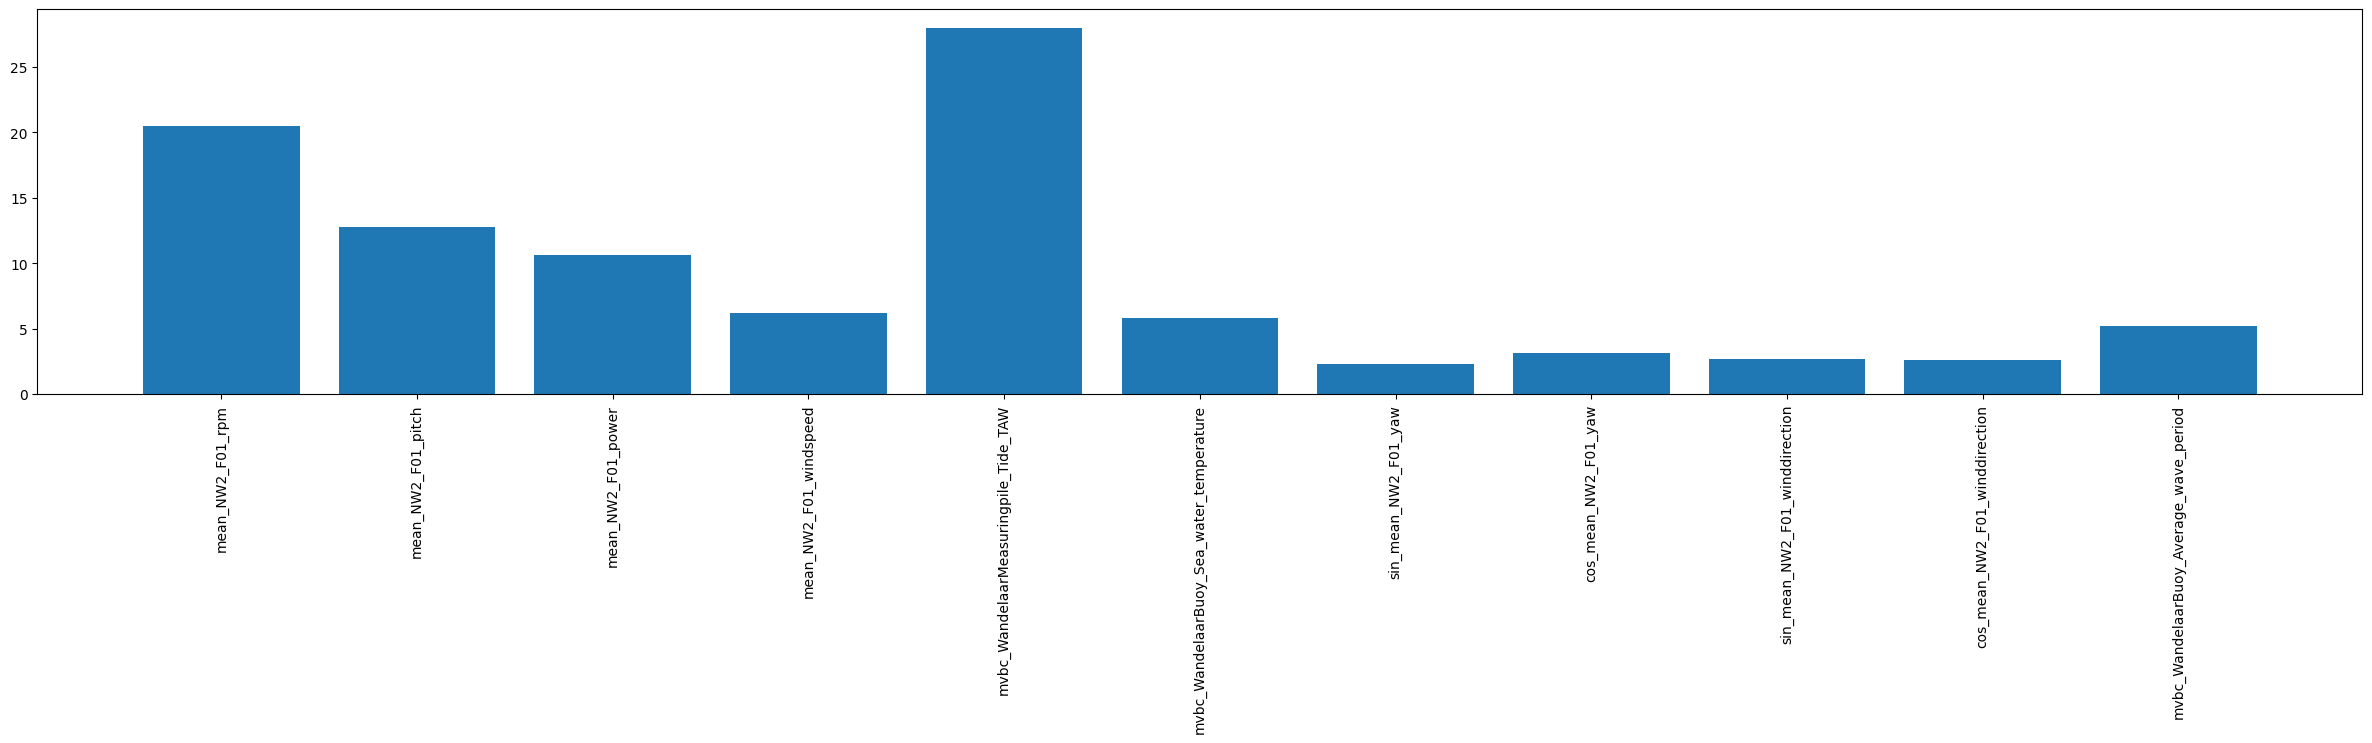

In [305]:
print(regr_model.feature_importances_)
print(regr_model.feature_names_)
plt.figure(figsize=(30,5))
plt.bar(regr_model.feature_names_, regr_model.feature_importances_)
plt.xticks(rotation=90)

In [306]:
ax2.scatter(preds_df.index, preds_df['data uncertainty'], label='data uncertainty', s=1, color='tab:orange')
